# Exercise 7

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Oppgeave 1 a) og b)
- Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
- Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).

In [77]:
data = pd.read_csv('data/agaricus-lepiota.data')

# Convert it to a pandas DataFrame
df = pd.DataFrame(data, columns=data.columns)
dummies = pd.get_dummies(df.drop('edibility', axis='columns'))

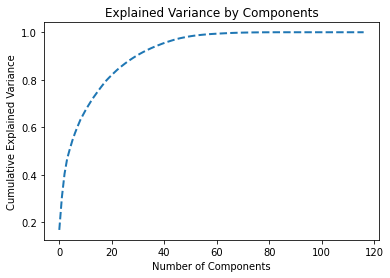

In [78]:
pca = PCA()
pca.fit(dummies)
amount = len(pca.explained_variance_ )

plt.figure()
plt.plot(range(0, amount), pca.explained_variance_ratio_.cumsum(), linestyle='--', linewidth=2)
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Vi applier 80/20 regelen: kan et subset på ca 20% forklare 80% av variansen?
Vi ser at 80% av variansen tilsier rundt 20 komponenter og vi setter `n_components=0.8` for å si at vi ønsker 80% varians. Dette vil da tilsvare `n_components=20`.

In [79]:
# Preprosessering: reduserer antall dimensjoner 
pca = PCA(n_components=20)
df_pca = pca.fit_transform(dummies)
print("Reduserte antall features til:", df_pca.shape[1])

Reduserte antall features til: 20


Basert på dette finner vi det optimale antall klynger basert på dette ved å bruke "Silhouette Coefficient". Disse verdiene (scores) varierer mellom -1 og 1. Større tall indikerer at prøvene er nærmere klyngene sine enn andre klynger. Dette er enkelt å se i grafen under.

In [80]:
silhouette_coefficients  = []
for i in range(2, 31):
		kmeans_pca = KMeans(n_clusters=i, init = 'k-means++')
		kmeans_pca.fit(df_pca)
		score = metrics.silhouette_score(df_pca, kmeans_pca.labels_, metric='euclidean')
		silhouette_coefficients.append(score)

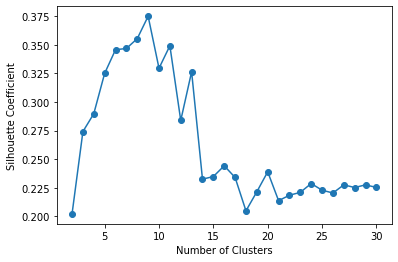

In [81]:
plt.figure()
plt.plot(range(2,31), silhouette_coefficients, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

Vi kan dermed finne x-verdien i topppunktet til grafen. Dette tilsvarer indexen til den høyeste verdien i listen med verdiene fra "Silhouette Coefficient": 

In [82]:
highest_score = max(silhouette_coefficients)
optimal_nr_of_clusters = silhouette_coefficients.index(highest_score)
print(f"Optimalt antall klynger: {optimal_nr_of_clusters} (verdi: {highest_score})")

Optimalt antall klynger: 7 (verdi: 0.37496390430318904)


### c) Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.


Vi har en relativ tett samling verdier for "Silhouette Coefficient". Tar derfor med oss de 5 største verdiene videre.

In [88]:
n = 5
optimal_nr_of_clusters_indices = sorted(silhouette_coefficients)[-n:]
indices_to_access = map(lambda item: silhouette_coefficients.index(item), optimal_nr_of_clusters_indices)
n_best_k = list(indices_to_access)[::-1]
print(n_best_k)

[7, 6, 9, 5, 4]


Plotter med disse verdiene for K:

5 beste verdier for K


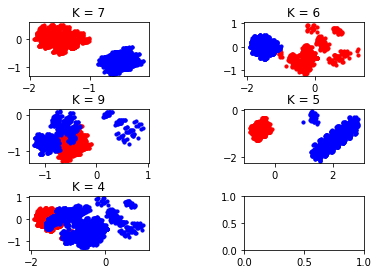

In [117]:
figure, axs = plt.subplots(3, 2)
plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.6, wspace=0.8)

print(f"{n} beste verdier for K")

for i,k in enumerate(n_best_k):
	x = int(i / 2)
	y = i % 2

	kmeans = KMeans(n_clusters=k, init= 'k-means++')
	Ypreds = kmeans.fit_predict(df_pca)

	axs[x, y].title.set_text(f'K = {k}')
	axs[x, y].scatter(df_pca[Ypreds == 0, 0], df_pca[Ypreds == 0, 1], s = 10, c = 'red')
	axs[x, y].scatter(df_pca[Ypreds == 1, 0], df_pca[Ypreds == 1, 1], s = 10, c = 'blue')
	
plt.show()